In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from baselines.run_rl.baselines_util import play_baselines
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/Users/sgillen/anaconda3/envs/baselines/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Logging to /var/folders/qq/gpxz4l6s1tndfdhysbz8bdym0000gn/T/openai-2019-06-06-18-31-29-599245


In [2]:
# You can only run this cell once or tensorflow/baselines complain about reusing tensors

save_path = './data/car/fps_test_noball'
t_data = pd.read_csv( save_path + '/progress.csv' ) # this is data about the training
model, env = play_baselines(save_path) # This is loading the trained model 

./data/car/fps_test_noball
fps_test_noball
Logging to /var/folders/qq/gpxz4l6s1tndfdhysbz8bdym0000gn/T/openai-2019-06-06-18-31-30-183933
env_type: bullet
current_dir=/Users/sgillen/work/bullet3/examples/pybullet/gym/pybullet_envs/bullet
init
options= 
Training ppo2 on bullet:bullet_car-v0 with arguments 
{'num_layers': 3, 'num_hidden': 24, 'load_path': '/Users/sgillen/work/baselines/baselines/run_rl/data/car/fps_test_noball/saved_model', 'network': 'mlp'}
Running trained model
init
options= 


counter 341 goal [0.31740277091697366, 2.5629460725806, 0.1] end_pos (0.4996892213821411, 2.6422531604766846, 0.051357053220272064)
counter 1001 goal [1.7563657020949954, -2.2227146681960352, 0.1] end_pos (0.15734323859214783, 3.678127905004658e-05, 0.05073492228984833)
sum of rewards =  47.38169170792389


Text(0.5, 1.0, 'rewards')

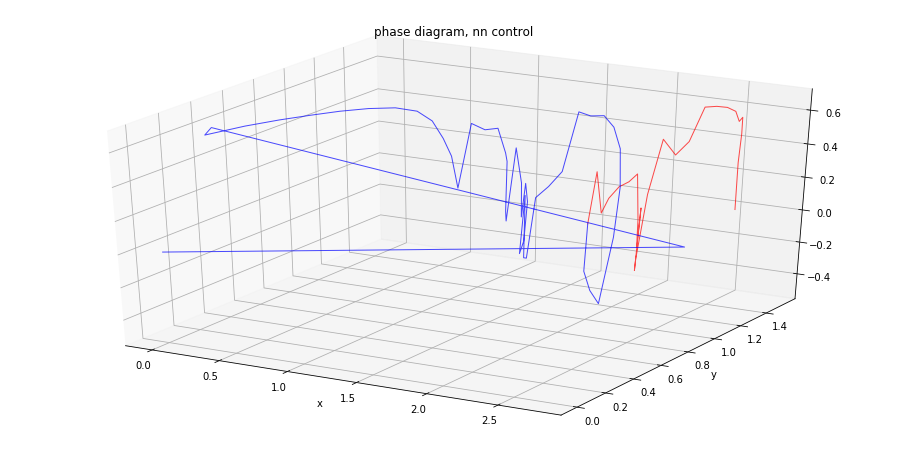

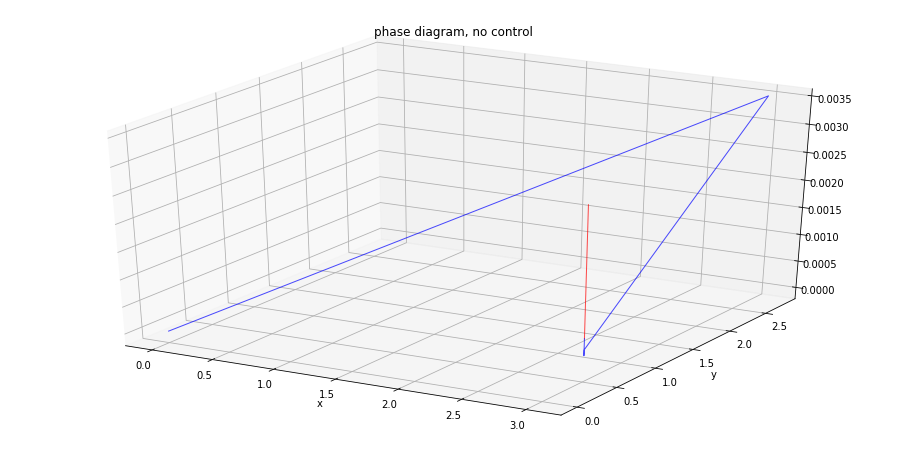

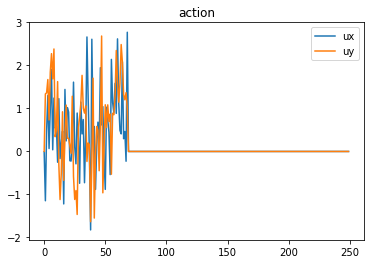

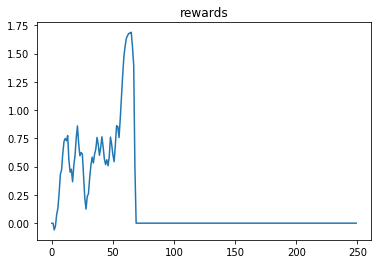

In [7]:
myenv = env.envs[0].env # OpenAI uses a bunch of wrappers around my env that don't maintain the member variables I put it
myenv.num_steps=250

action_hist = np.zeros((myenv.num_steps, myenv.action_space.shape[0]))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))

passive_action_hist = np.zeros((myenv.num_steps, myenv.action_space.shape[0]))
passive_state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
passive_reward_hist = np.zeros((myenv.num_steps, 1))

obs = env.reset()


# play one episode with control on
for i in range(myenv.num_steps):
        actions, _, _, _ = model.step(obs)
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        env.render()
        if done:
            break
            
# play one episode with no control
for i in range(myenv.num_steps):
        actions = np.zeros(myenv.action_space.shape[0])
        obs, reward, done, _ = env.step(actions)        
        passive_action_hist[i,:] = np.copy(actions)
        passive_state_hist[i,:] = np.copy(obs)
        passive_reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break 
            
            
print('sum of rewards = ' , np.sum(reward_hist))

x = state_hist[:,0]; y = state_hist[:,1]; z = state_hist[:,2]
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.plot(x[0:25],y[0:25],z[0:25], alpha=0.7, linewidth=1, color='r')
ax.plot(x[24:-1],y[24:-1],z[24:-1], alpha=0.7, linewidth=1, color='b')
plt.xlabel('x'); plt.ylabel('y'); 
ax.set_title('phase diagram, nn control')


x = passive_state_hist[:,0]; y = passive_state_hist[:,1]; z = passive_state_hist[:,2]
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.plot(x[0:25],y[0:25],z[0:25], alpha=0.7, linewidth=1, color='r')
ax.plot(x[24:-1],y[24:-1],z[24:-1], alpha=0.7, linewidth=1, color='b')
plt.xlabel('x'); plt.ylabel('y'); 
ax.set_title('phase diagram, no control')


plt.figure()
plt.plot(action_hist)
plt.title('action')
plt.legend (('ux', 'uy', 'uz'))

plt.figure()
plt.plot(reward_hist)
plt.title('rewards')

In [6]:
reward_hist.shape

(250, 1)

In [ ]:
# Only applies to the LL

In [3]:
t_data

,explained_variance,fps,nupdates,policy_entropy,total_timesteps,value_loss
0,0.340546,1185,1,4.256815,40,9.807541
1,0.208593,6938,100,4.256229,4000,9.189608
2,0.440147,7203,200,4.255836,8000,4.893818
3,0.628870,6854,300,4.255843,12000,4.414436
4,0.690364,6915,400,4.256162,16000,3.677882
5,0.800358,6777,500,4.255628,20000,2.306529
6,0.477543,6762,600,4.257615,24000,5.657037
7,-0.656294,6728,700,4.254935,28000,20.174974
8,-5.224108,6679,800,4.256201,32000,68.513840
9,-12.497432,6666,900,4.250167,36000,143.191666


<Figure size 432x288 with 0 Axes>

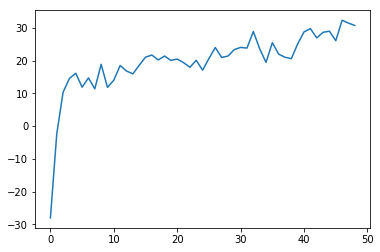

<Figure size 432x288 with 0 Axes>

In [4]:
plt.plot(t_data['eprewmean'])
plt.figure()